In [36]:
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
        
    return shannonEnt


In [37]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
    [1, 1, 'yes'],
    [1, 0, 'no'],
    [0, 1, 'no'],
    [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [38]:
myDat, labels = createDataSet()

In [39]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [40]:
labels

['no surfacing', 'flippers']

In [41]:
calcShannonEnt(myDat)

0.9709505944546686

In [42]:
## A MAYOR ENTROPÍA-> MÁS MEEZCLADOS ESTÁN LOS DATOS ##
myDat[0][2] = 'maybe'

In [43]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [44]:
calcShannonEnt(myDat)

1.3709505944546687

In [45]:
def splitDataSet(dataSet, axis, value): #axis: en que columna fijarse, value: el que queremos que coincida
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] #Crea vector vacío
            reducedFeatVec.extend(featVec[axis+1:]) #Selecciona cols(axis+1:end)
            retDataSet.append(reducedFeatVec) #Añade a retDataSet
    return retDataSet

In [46]:
a = [1,2,3]
b = [4,5,6]
a.append(b)
a

[1, 2, 3, [4, 5, 6]]

In [47]:
a = [1,2,3]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [48]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [49]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [53]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature 

In [54]:
myDat, labels = createDataSet()


In [57]:
#NOS DA LA CARACTERÍSTICA QUE MEJOR SEPARA NUESTROS DATOS
#SE ASUME QUE myDat VIENE EN FORMA DE LISTA DE LISTAS
#SE ASUME QUE LA ULTIMA COLUMNA ES LA CLASE
#EL TIPO DEE LOS DATOS PUEDE SER NUMÉRO O STRING NO IMPORTA
chooseBestFeatureToSplit(myDat)

0

In [56]:
myDat #LA MEJOR CARACTERÍSTICA PARA SEPARAR LOS DATOS ES LA PRIMERA

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [59]:
#Recibe una lista de nombres de clases y crea un diccionario
#Devuelve la clase que ocurre con mayor frecuencia
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),
    key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0] 

In [60]:
#Recibe conjunto de datos y lista de etiquetas(una por cada atributo de dataSet)

def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet] #Crea lista de todas las clases en dataSet
    if classList.count(classList[0]) == len(classList): #Si todas las clases son la misma
        return classList[0]
    if len(dataSet[0]) == 1: #Cuando no hay más atributos devuelve majority
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                        (dataSet, bestFeat, value),subLabels)
    return myTree

In [62]:
myDat, labels = createDataSet()
myTree = createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [63]:
##PLOT TREE
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,
    xycoords='axes fraction',
    xytext=centerPt, textcoords='axes fraction',
    va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

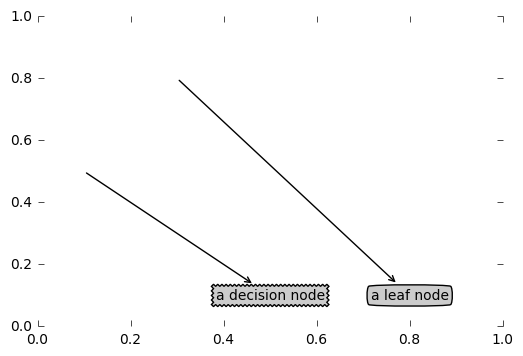

In [64]:
createPlot()

In [66]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs +=1
    return numLeafs

In [67]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
            
    return maxDepth               

In [68]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': \
    {0: 'no', 1: 'yes'}}}},
    {'no surfacing': {0: 'no', 1: {'flippers': \
    {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]

In [69]:
myTree = retrieveTree (0)

In [70]:
getNumLeafs(myTree)

3

In [71]:
getTreeDepth(myTree)

2

In [72]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    getTreeDepth(myTree)
    firstStr = myTree.keys()[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,\
                            plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

In [73]:
 myTree=retrieveTree (0)

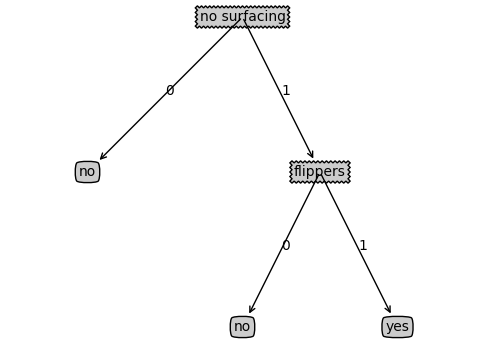

In [74]:
createPlot(myTree)

In [75]:
myTree['no surfacing'][3]='maybe'

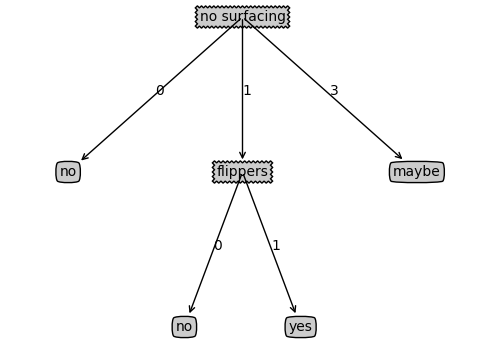

In [76]:
createPlot(myTree)

In [77]:
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else: classLabel = secondDict[key]
    return classLabel

In [79]:
myDat,labels=createDataSet()
labels

['no surfacing', 'flippers']

In [80]:
myTree=retrieveTree (0)

In [81]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [82]:
classify(myTree,labels,[1,0])

'no'

In [83]:
classify(myTree,labels,[1,1])

'yes'

In [85]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [86]:
storeTree(myTree,'classifierStorage.txt')

In [87]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}